Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [8]:
import os
import pandas as pd
import xlrd

def leer_precios(filename):
    df = pd.read_excel(filename)
    for index, row in df.iterrows():
        if (row[0] == 'Fecha'):
            x = index + 1
            df = pd.read_excel(filename, skiprows = x, usecols = list(range(26)))
            break
    df
    
    return df


path = '.'
files = os.listdir(path)
# x = !ls precios/ 
files = [i for i in files if '.xls' in i]
y = 0
dfs = []
for i in files:
    df = pd.read_excel(i)
    dfs.append(leer_precios(i))
dfs

for i in dfs:
    if 'Version' in i.columns.values:
        del i['Version']
df = pd.concat(dfs)

df = pd.melt(df, id_vars='Fecha')

df.columns = ['Fecha', 'Hora', 'Precio']
df

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [9]:
filtered_df = df[df['Precio'].notnull()]
print(df.shape[0] - filtered_df.shape[0])

238


**3.--** Compute e imprima el número de registros duplicados.

In [10]:
duplicates_out_df = df.copy()
duplicates_out_df = duplicates_out_df.drop_duplicates()
print(df.shape[0] - duplicates_out_df.shape[0])

1951


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [11]:
df = df[df['Precio'].notnull()]
df = df.drop_duplicates()
print(df.shape[0])

199819


**5.--** Compute y grafique el precio primedio diario.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


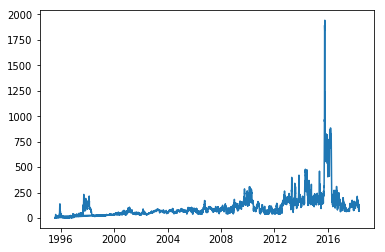

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
data = df.copy()
data = data.groupby(['Fecha']).mean()['Precio']
plt.plot(data)

**6.--** Compute y grafique el precio máximo por mes.

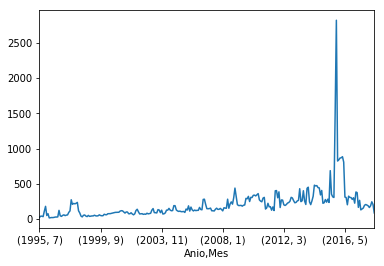

In [13]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio', 'Mes']).max()['Precio']
data.plot()

**7.--** Compute y grafique el precio mínimo mensual.

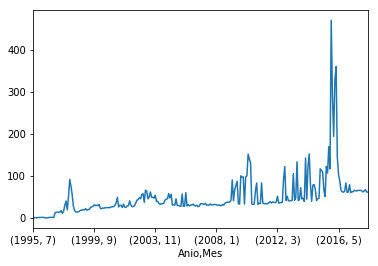

In [14]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio', 'Mes']).min()['Precio']
data.plot()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

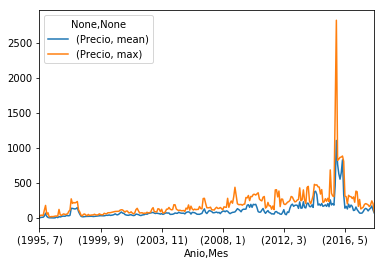

In [15]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio','Mes']).agg(('mean', 'max'))
data.plot()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

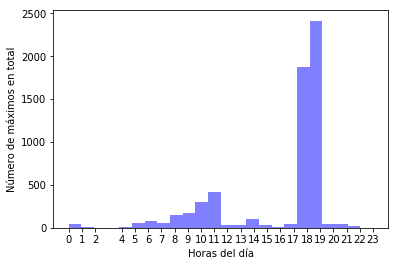

In [16]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Dia'] = data['Fecha'].dt.day_name()
data = data.loc[data.groupby("Fecha")["Precio"].idxmax()]
data['Hora'] = data['Hora'].astype(int)
data = data.loc[data['Dia'].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]

data = data[['Hora', 'Precio']].groupby(['Hora']).size().reset_index(name='counts')
x = []

for i, row in data.iterrows():
    for j in range(row['counts']):
        x.append(row['Hora'])
        
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xticks(data['Hora'])
plt.ylabel('Número de máximos en total')
plt.xlabel('Horas del día')
plt.figsize=(22,12)
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

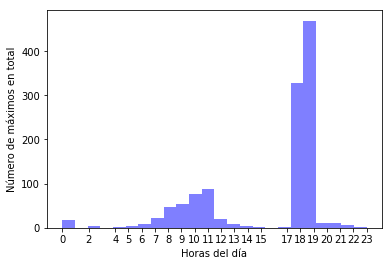

In [17]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Dia'] = data['Fecha'].dt.day_name()
data = data.loc[data.groupby("Fecha")["Precio"].idxmax()]
data['Hora'] = data['Hora'].astype(int)
data = data.loc[data['Dia'].isin(["Saturday"])]

data = data[['Hora', 'Precio']].groupby(['Hora']).size().reset_index(name='counts')
x = []

for i, row in data.iterrows():
    for j in range(row['counts']):
        x.append(row['Hora'])
        
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xticks(data['Hora'])
plt.ylabel('Número de máximos en total')
plt.xlabel('Horas del día')
plt.figsize=(22,12)
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

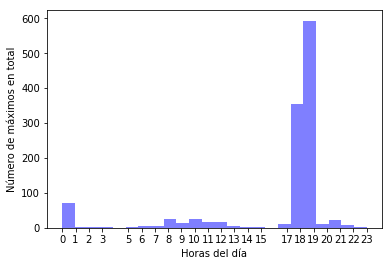

In [18]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Dia'] = data['Fecha'].dt.day_name()
data = data.loc[data.groupby("Fecha")["Precio"].idxmax()]
data['Hora'] = data['Hora'].astype(int)
data = data.loc[data['Dia'].isin(["Sunday"])]

data = data[['Hora', 'Precio']].groupby(['Hora']).size().reset_index(name='counts')
x = []

for i, row in data.iterrows():
    for j in range(row['counts']):
        x.append(row['Hora'])
        
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xticks(data['Hora'])
plt.ylabel('Número de máximos en total')
plt.xlabel('Horas del día')
plt.figsize=(22,12)
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [19]:
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data = data.loc[data.groupby("Anio")["Precio"].idxmin()]
data = data[["Anio", "Fecha", "Precio"]]
data

,Anio,Fecha,Precio
8,1995,1995-07-28,0.000000
346,1996,1996-06-30,0.000000
17556,1997,1997-07-15,10.882310
1100,1998,1998-07-12,13.847330
51835,1999,1999-03-28,18.359530
52207,2000,2000-03-25,21.531167
27493,2001,2001-08-20,24.822879
2518,2002,2002-04-29,26.777682
2809,2003,2003-02-14,37.013438
11627,2004,2004-03-29,32.252998


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---